# **Memory**

## **What's covered?**
1. What is Memory?
2. Building Memory into a system
3. Depricated Classes
4. Buidling End-to-end Conversational AI Bot by designing Memory from Scratch
    - Step 1: Import Chat Model and Configure the API Key
    - Step 2: Create Chat Template
    - Step 3: Create a Output Parser
    - Step 4: Initialize the Memory
    - Step 5: Build a Chain
    - Step 6: Invoke the chain
    - Step 7: Saving to memory
    - Step 8: Run Step 6 and 7 in a loop
5. Saving a Chat History to a Pickle File
6. Loading a Chat History from a Pickle File

## **What is Memory?**
Memory is a cognitive function that allows people to store, retrieve, and use information to understand their present and future. Consider the frustration of working with a colleague who forgets everything you tell them, requiring constant repetition! As AI agents undertake more complex tasks involving numerous user interactions, equipping them with memory becomes equally crucial for efficiency and user satisfaction. With memory, agents can learn from feedback and adapt to users' preferences. 

Most LLM applications have a conversational interface. An essential component of a conversation is being able to refer to information introduced earlier in the conversation. At bare minimum, a conversational system should be able to access some window of past messages directly. A more complex system will need to have a world model that it is constantly updating, which allows it to do things like maintain information about entities and their relationships.

We call this ability to store information about past interactions "memory". 

## **Building memory into a system**
The two core design decisions in any memory system are:
- How state is stored
- How state is queried

## **Depricated Classes (Available in langchain_classic - Support available till Dec 2026)**
- ConversationBufferMemory
- ConversationStringBufferMemory
- ConversationBufferWindowMemory
- ConversationTokenBufferMemory
- ConversationSummaryMemory
- ConversationSummaryBufferMemory
- VectorStoreRetrieverMemory

## **Buidling End-to-end Conversational AI Bot by designing Memory from Scratch**

### **Steps:**
1. Import Chat Model and Configure the API Key
2. Create Chat Template
3. Create a Output Parser
4. Initialize the Memory
5. Build a Chain
6. Invoke the chain with human_input and chat_history
7. Saving to memory
8. Run Step 6 and 7 in a loop

<img src="images/memory.png">

### **Step 1: Import Chat Model and Configure the API Key**

In [1]:
# Step 1 - Import Chat Model and Configure the API Key

from langchain_openai import ChatOpenAI

# Setup API Key
f = open('keys/.openai_api_key.txt')
OPENAI_API_KEY = f.read()

# Set the OpenAI Key and initialize a ChatModel
chat_model = ChatOpenAI(api_key=OPENAI_API_KEY, model="gpt-4o-mini")

/Users/kanavbansal/Developer/.env_langchain/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Step 2: Create Chat Template**

In [2]:
# Step 2 - Create Chat Template

from langchain_core.messages import SystemMessage
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, MessagesPlaceholder

chat_template = ChatPromptTemplate(
    messages = [
        # The persistent system prompt
        SystemMessage(
            content="You are a chatbot having a conversation with a human."
        ),
        # Creating a chat_history placeholder
        MessagesPlaceholder(
            variable_name="chat_history"
        ),  
        # Human Prompt
        HumanMessagePromptTemplate.from_template(
            "{human_input}"
        ),
    ]
)

### **Step 3: Create a Output Parser**

In [3]:
# Step 3 - Create a Output Parser

from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

### **Step 4: Initialize the Memory**

In [4]:
# Step 4 - Initialize the Memory
from langchain_core.runnables import RunnableLambda

memory_buffer = {"history": []}

def get_history_from_buffer(human_input):
    return memory_buffer["history"]

runnable_get_history_from_buffer = RunnableLambda(get_history_from_buffer)

#### **RunnablePassthrough:** RunnablePassthrough on its own allows you to pass inputs unchanged.

### **Step 5: Build a Chain**

In [5]:
# Step 5 - Build a Chain (Another way)
from langchain_core.runnables import RunnablePassthrough

# Define a chain
chain = RunnablePassthrough.assign(
        chat_history=runnable_get_history_from_buffer
        ) | chat_template | chat_model | output_parser

In [8]:
# !pip install grandalf

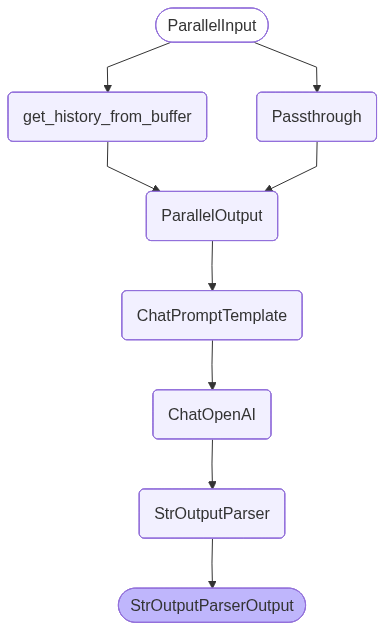

In [7]:
from IPython.display import Image, display

display(Image(chain.get_graph().draw_mermaid_png()))

### **Step 6: Invoke the chain**

In [6]:
# Step 6 - Invoke the chain with human_input and chat_history

query = {"human_input": "Hi, How are you?"}

response = chain.invoke(query)

response

"Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

In [7]:
memory_buffer

{'history': []}

### **Step 7: Saving to memory**

In [8]:
# Step 7 - Saving to memory
from langchain_core.messages import HumanMessage, AIMessage

memory_buffer["history"].append(HumanMessage(content=query["human_input"]))
memory_buffer["history"].append(AIMessage(content=response))

memory_buffer

{'history': [HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={}, response_metadata={})]}

### **Step 8 - Run Step 6 and 7 in a loop**

In [10]:
# Step 8 - Run Step 6 and 7 in a loop

while True:
    query = {"human_input" : input('Enter your input: ')}
    print(f"*User: {query['human_input']}")
    if query["human_input"] in ['bye', 'quit', 'exit']:
        break
    response = chain.invoke(query)
    print(f"*AI: {response}")

    memory_buffer["history"].append(HumanMessage(content=query["human_input"]))
    memory_buffer["history"].append(AIMessage(content=response))

Enter your input:  My name is Kanav


*User: My name is Kanav
*AI: Hello Kanav! It's nice to meet you. How can I assist you today?


Enter your input:  just exploring


*User: just exploring
*AI: That's great! Feel free to ask me anything or share any topics you'd like to explore. I'm here to help and provide information.


Enter your input:  that's good to know


*User: that's good to know
*AI: I'm glad to hear that! If you have any questions or need assistance, don't hesitate to ask. I'm here to help.


Enter your input:  what;s my name?


*User: what;s my name?
*AI: Your name is Kanav.


Enter your input:  exit


*User: exit


In [11]:
memory_buffer["history"]

[HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to assist you. How can I help you today?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My name is Kanav', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello Kanav! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='just exploring', additional_kwargs={}, response_metadata={}),
 AIMessage(content="That's great! Feel free to ask me anything or share any topics you'd like to explore. I'm here to help and provide information.", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="that's good to know", additional_kwargs={}, response_metadata={}),
 AIMessage(content="I'm glad to hear that! If you have any questions or need assistance, don't hesitate to ask. I'm here to help.", 

## **Saving a Chat History to a Pickle File**

**Let's now learn to save this history on the disk so that whenever we can load the history whenever we chat with our assistant.**

In [12]:
import pickle

chat_history = pickle.dumps(memory_buffer)

with open("chats_data/conversation_memory.pkl", "wb") as f:
    f.write(chat_history)

## **Loading a Chat History from a Pickle File**

In [13]:
chat_history_loaded = pickle.load(open("chats_data/conversation_memory.pkl", "rb"))

In [14]:
chat_history_loaded

{'history': [HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to assist you. How can I help you today?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='My name is Kanav', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello Kanav! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='just exploring', additional_kwargs={}, response_metadata={}),
  AIMessage(content="That's great! Feel free to ask me anything or share any topics you'd like to explore. I'm here to help and provide information.", additional_kwargs={}, response_metadata={}),
  HumanMessage(content="that's good to know", additional_kwargs={}, response_metadata={}),
  AIMessage(content="I'm glad to hear that! If you have any questions or need assistance, don't hesitate to ask. I